In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from pandas_datareader import data as pdr
import yfinance as yf

In [5]:
from datetime import datetime,timedelta

In [6]:
yf.pdr_override()
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [13]:
end = datetime.now()
#start = datetime(end.year - 1,end.month,end.day)

start = end - timedelta(days=365)

end, start

(datetime.datetime(2023, 11, 3, 11, 39, 39, 441628),
 datetime.datetime(2022, 11, 3, 11, 39, 39, 441628))

In [19]:



for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)
    



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [20]:
GOOG

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-03,86.345001,86.550003,83.449997,83.489998,83.489998,48510400
2022-11-04,85.510002,86.730003,83.879997,86.699997,86.699997,40173300
2022-11-07,87.339996,88.940002,86.959999,88.650002,88.650002,26899900
2022-11-08,89.160004,90.404999,87.650002,88.910004,88.910004,30172000
2022-11-09,88.544998,89.489998,87.360001,87.400002,87.400002,26743900
...,...,...,...,...,...,...
2023-10-27,124.029999,124.440002,121.459999,123.400002,123.400002,37367700
2023-10-30,124.459999,126.550003,123.879997,125.750000,125.750000,24165600
2023-10-31,126.269997,126.559998,123.925003,125.300003,125.300003,21123400


In [21]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,164.590519,166.269044,163.119203,164.787211,164.455830,6.375104e+07
std,18.584868,18.424849,18.795320,18.580094,18.746224,1.981164e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,148.884995,150.669998,147.379997,149.154999,148.748100,5.030210e+07
50%,169.339996,170.899994,167.619995,169.589996,169.127365,5.849910e+07
75%,178.275002,179.985001,177.090004,178.500000,178.499405,7.076155e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.601569e+08


In [22]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-03 to 2023-11-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

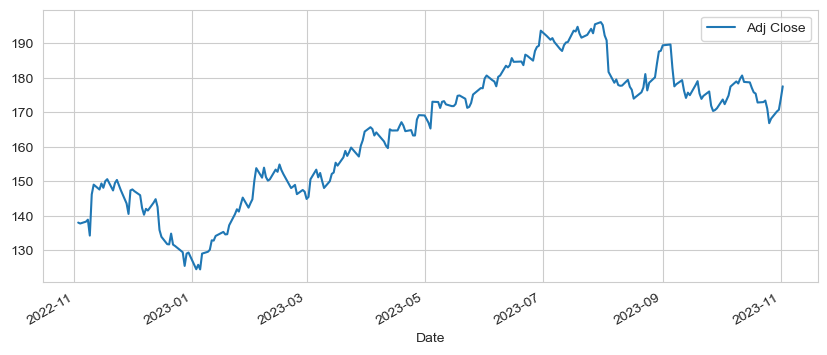

In [23]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

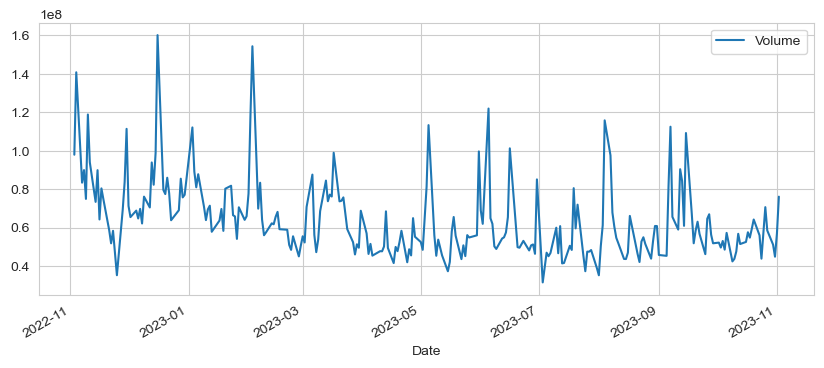

In [25]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [28]:
ma_day =[10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window = ma).mean()

<Axes: xlabel='Date'>

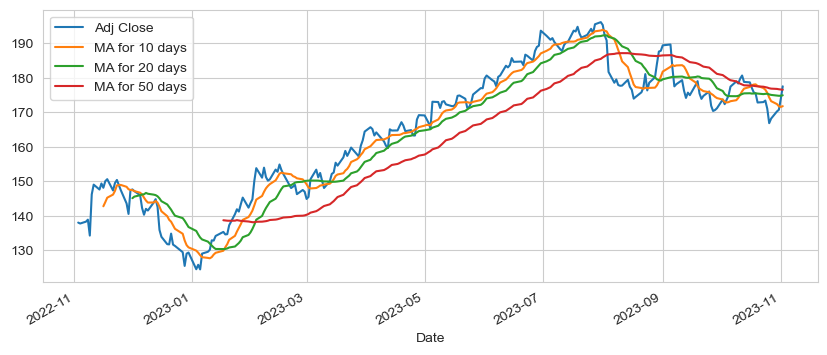

In [30]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [33]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

<Axes: xlabel='Date'>

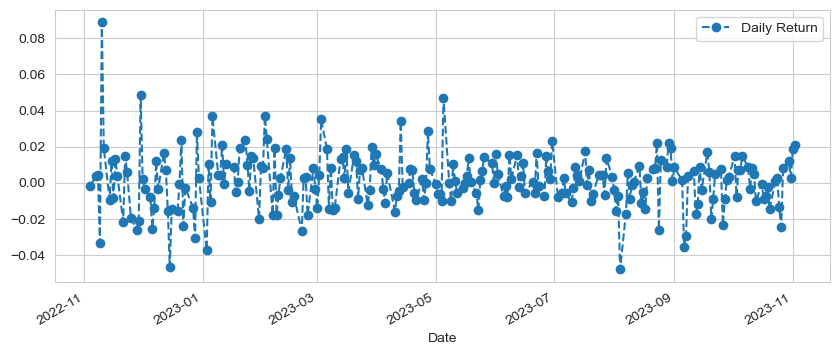

In [34]:
AAPL['Daily Return'].plot(figsize = (10,4),legend=True,linestyle='--',marker = 'o')

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_3768\3101676589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=AAPL['Daily Return'],bins=100,color='violet')


<Axes: ylabel='Density'>

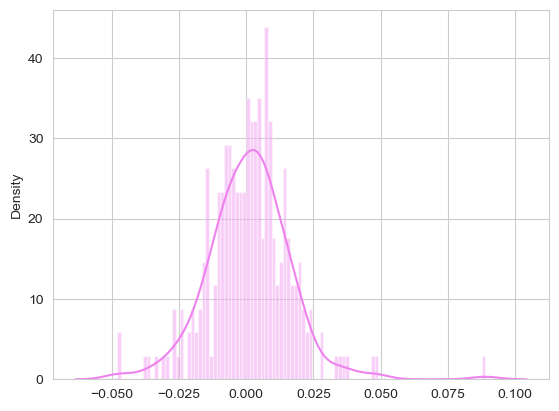

In [44]:
sns.distplot(x=AAPL['Daily Return'],bins=100,color='violet')

<Axes: >

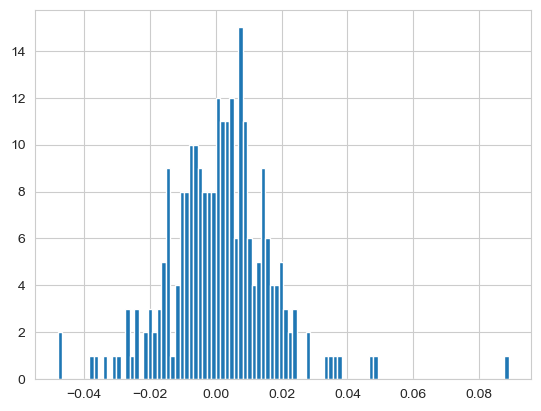

In [45]:
AAPL['Daily Return'].hist(bins=100)

In [50]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [51]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-03,138.060974,89.300003,83.489998,212.199982
2022-11-04,137.792114,90.980003,86.699997,219.271652
2022-11-07,138.329819,90.529999,88.650002,225.689667
2022-11-08,138.907364,89.980003,88.910004,226.680099
2022-11-09,134.297028,86.139999,87.400002,222.361801


In [52]:
tech_rets = closing_df.pct_change()

In [53]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-03,NaN,NaN,NaN,NaN
2022-11-04,-0.001947,0.018813,0.038448,0.033326
2022-11-07,0.003902,-0.004946,0.022491,0.029270
2022-11-08,0.004175,-0.006075,0.002933,0.004388
2022-11-09,-0.033190,-0.042676,-0.016983,-0.019050


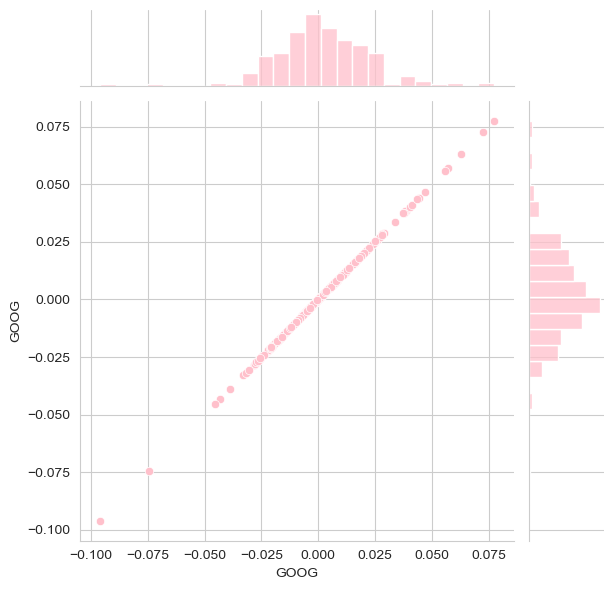

In [56]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='pink')

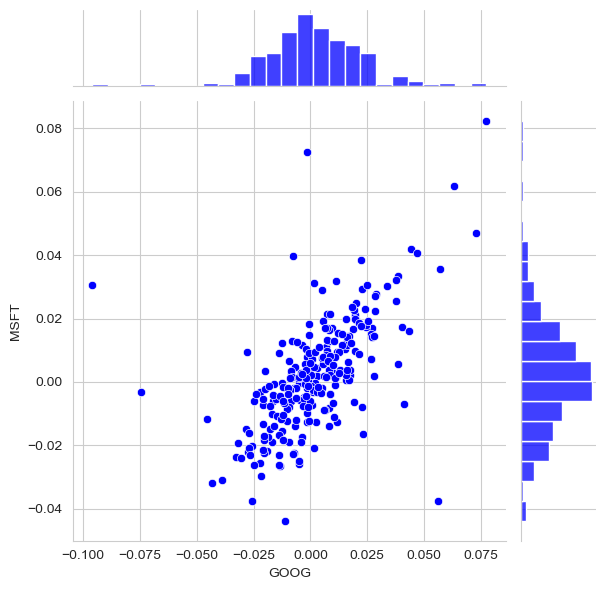

In [58]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter',color='BLUE')

In [59]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-03,NaN,NaN,NaN,NaN
2022-11-04,-0.001947,0.018813,0.038448,0.033326
2022-11-07,0.003902,-0.004946,0.022491,0.029270
2022-11-08,0.004175,-0.006075,0.002933,0.004388
2022-11-09,-0.033190,-0.042676,-0.016983,-0.019050


C:\Users\ANIKET\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


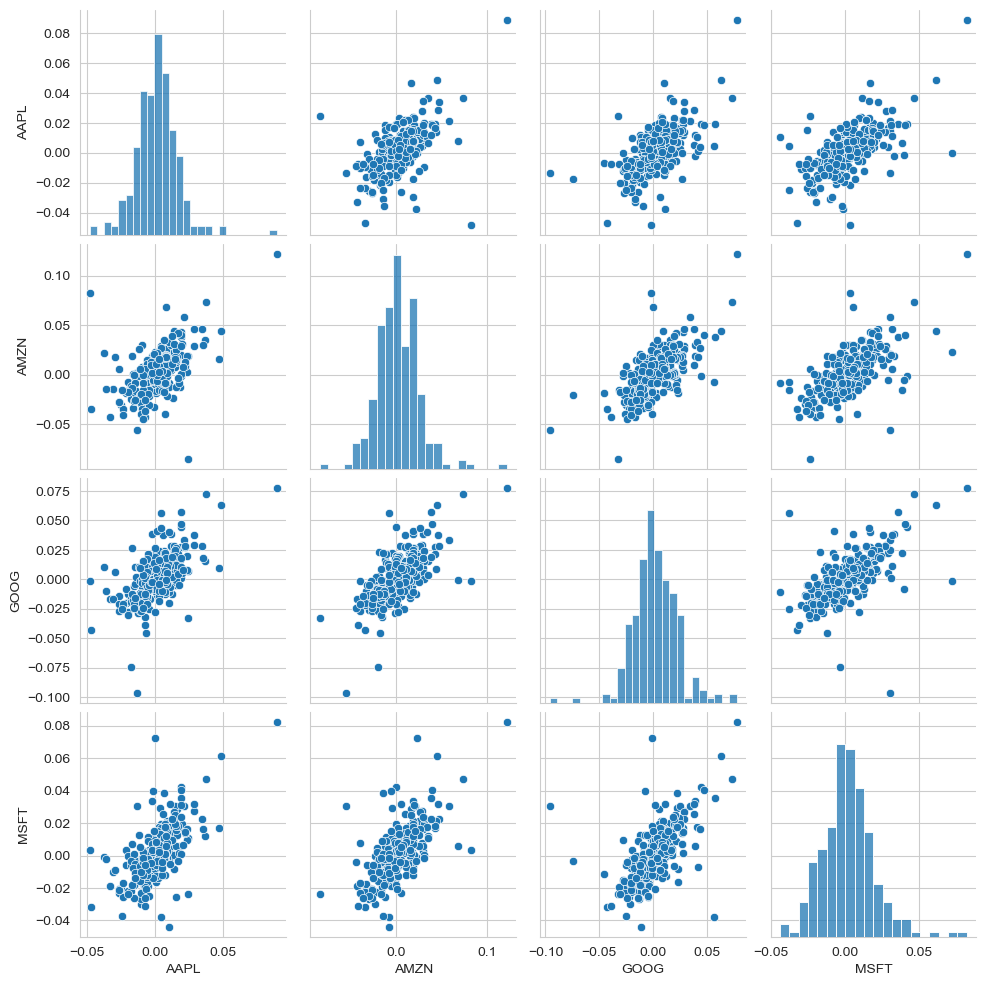

In [60]:
sns.pairplot(tech_rets.dropna())

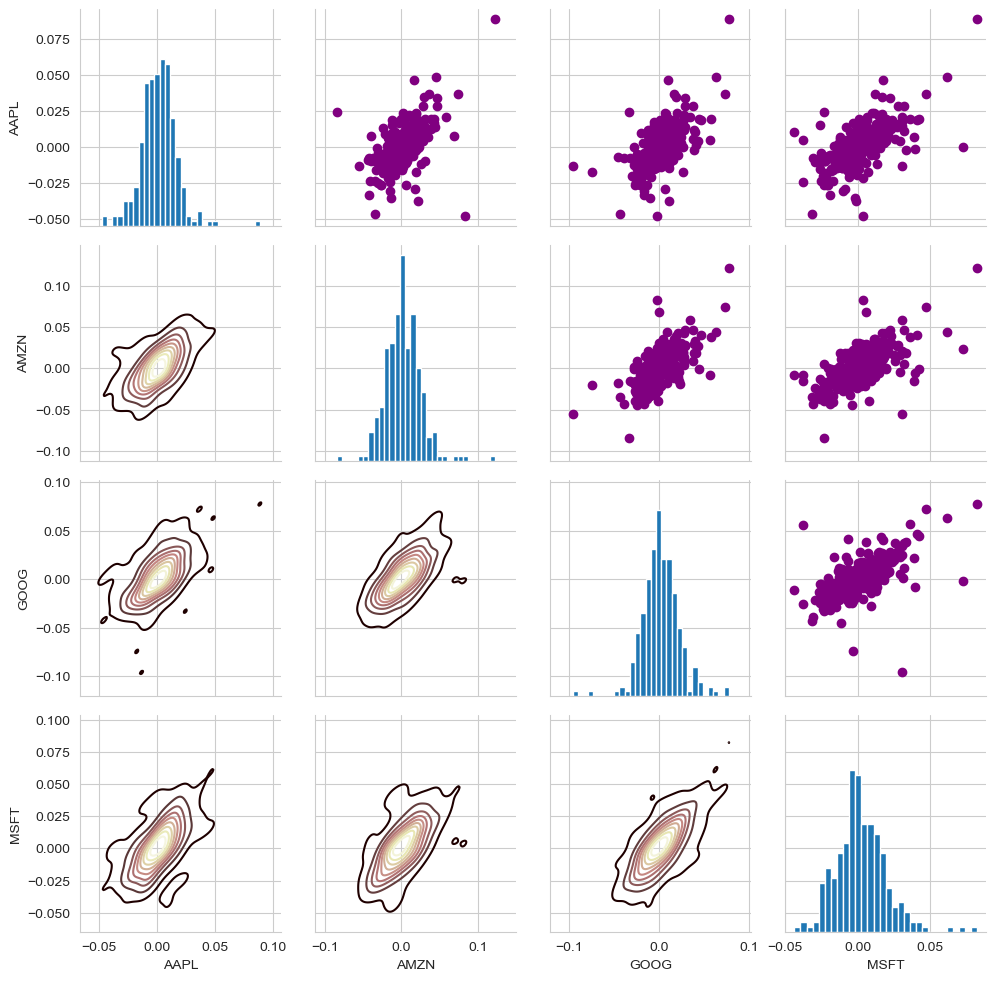

In [63]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='pink')
returns_fig.map_diag(plt.hist,bins=30)

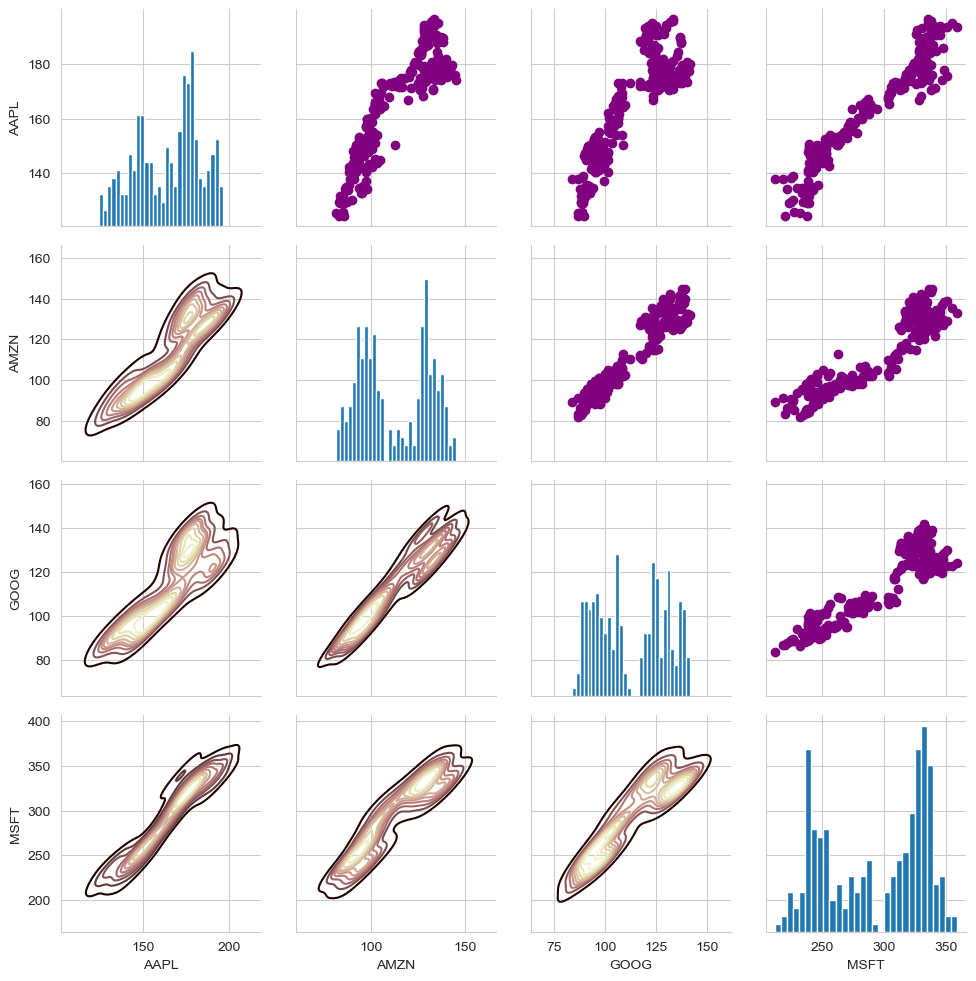

In [64]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='pink')
returns_fig.map_diag(plt.hist,bins=30)

<Axes: >

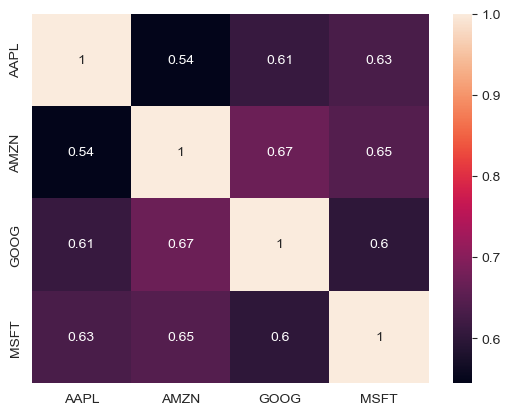

In [67]:
correlation_matrix = tech_rets.corr()

sns.heatmap(correlation_matrix,annot=True)

<Axes: >

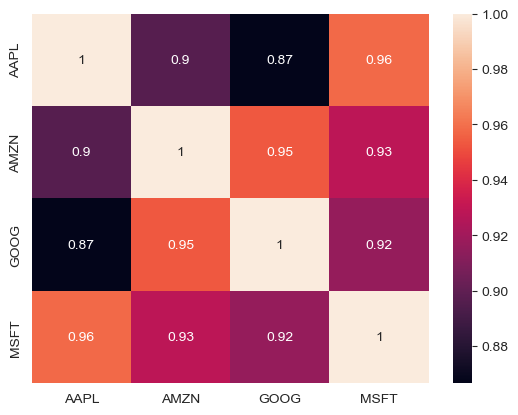

In [68]:
correlation_matrix2 = closing_df.corr()
sns.heatmap(correlation_matrix2,annot=True)

In [69]:
rets =tech_rets.dropna()

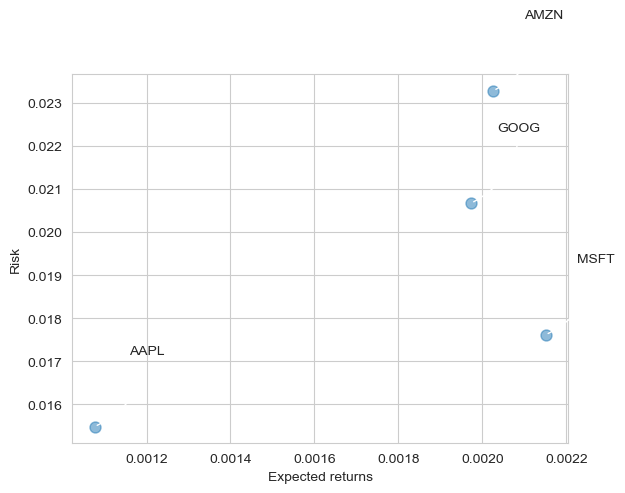

In [70]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


C:\Users\ANIKET\AppData\Local\Temp\ipykernel_3768\3101676589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=AAPL['Daily Return'],bins=100,color='violet')


<Axes: ylabel='Density'>

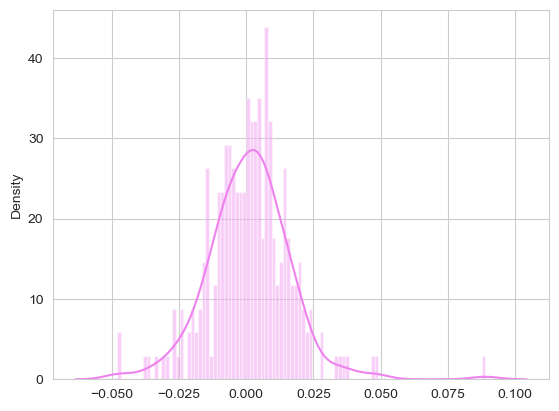

In [71]:
sns.distplot(x=AAPL['Daily Return'],bins=100,color='violet')

In [72]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-04,-0.001947,0.018813,0.038448,0.033326
2022-11-07,0.003902,-0.004946,0.022491,0.029270
2022-11-08,0.004175,-0.006075,0.002933,0.004388
2022-11-09,-0.033190,-0.042676,-0.016983,-0.019050
2022-11-10,0.088974,0.121778,0.077460,0.082268


In [73]:
rets['AAPL'].quantile(0.05)

-0.023585495773578935

In [76]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-03,86.345001,86.550003,83.449997,83.489998,83.489998,48510400
2022-11-04,85.510002,86.730003,83.879997,86.699997,86.699997,40173300
2022-11-07,87.339996,88.940002,86.959999,88.650002,88.650002,26899900
2022-11-08,89.160004,90.404999,87.650002,88.910004,88.910004,30172000
2022-11-09,88.544998,89.489998,87.360001,87.400002,87.400002,26743900


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

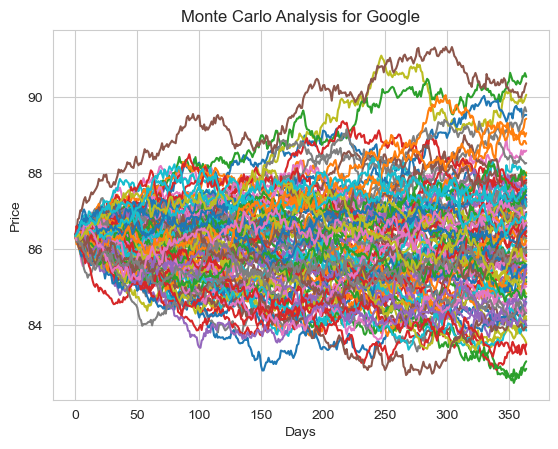

In [91]:
days = 365
dt = 1/days

mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

def stock_monte_carlo(start_price, days, mu, sigma):

    price = np.zeros(days)
    price[0] = start_price

    for x in range(1, days): 

        drift = mu * dt
        shock = sigma * np.random.normal(loc=0, scale=np.sqrt(dt))
        
        price[x] = price[x-1] + price[x-1] * (drift + shock)

    return price

start_price = 86.35

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google')


In [92]:

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

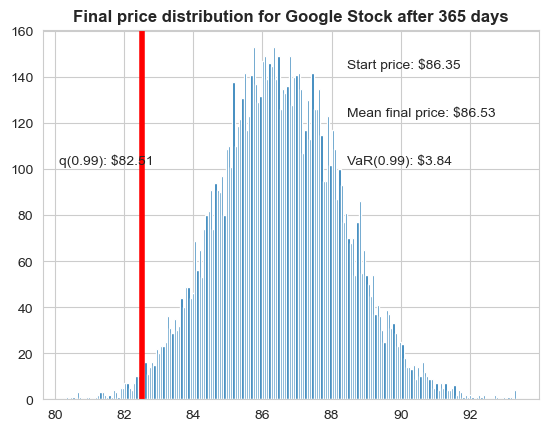

In [93]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');